In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import re
import joblib
from tensorflow.keras.preprocessing.text import Tokenizer
import gensim
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split


In [11]:
df = pd.read_csv("data.csv",encoding='latin-1',header=None)


In [12]:
df.head()

,"<!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv=""content-type"" content=""text/html; charset=utf-8""/><style nonce=""yiXmdwGs4nYfKd9MXNEgHw"">.goog-link-button{position:relative;color:#15c;text-decoration:underline;cursor:pointer}.goog-link-button-disabled{color:#ccc;text-decoration:none;cursor:default}body{color:#222;font:normal 13px/1.4 arial",sans-serif;margin:0}.grecaptcha-badge{visibility:hidden}.uc-main{padding-top:50px;text-align:center}#uc-dl-icon{display:inline-block;margin-top:16px;padding-right:1em;vertical-align:top}#uc-text{display:inline-block;max-width:68ex;text-align:left}.uc-error-caption,".uc-warning-caption{color:#222;font-size:16px}#uc-download-link{text-decoration:none}.uc-name-size a{color:#15c;text-decoration:none}.uc-name-size a:visited{color:#61c;text-decoration:none}.uc-name-size a:active{color:#d14836;text-decoration:none}.uc-footer{color:#777;font-size:11px;padding-bottom:5ex;padding-top:5ex;text-align:center}.uc-footer a{color:#15c}.uc-footer a:visited{color:#61c}.uc-footer a:active{color:#d14836}.uc-footer-divider{color:#ccc;width:100%}.goog-inline-block{position:relative;display:-moz-inline-box;display:inline-block}* html .goog-inline-block{display:inline}*:first-child+html .goog-inline-block{display:inline}sentinel{}</style><link rel=""icon"" href=""//ssl.gstatic.com/docs/doclist/images/drive_2022q3_32dp.png""/></head><body><div class=""uc-main""><div id=""uc-dl-icon"" class=""image-container""><div class=""drive-sprite-aux-download-file""></div></div><div id=""uc-text""><p class=""uc-warning-caption"">Google Drive can't scan this file for viruses.</p><p class=""uc-warning-subcaption""><span class=""uc-name-size""><a href=""/open?id=1mHNimFKZRjQvR54pjlKy6MRZKlDbU7SI"">data.csv</a> (228M)</span> is too large for Google to scan for viruses. Would you still like to download this file?</p><form id=""download-form"" action=""https://drive.usercontent.google.com/download"" method=""get""><input type=""submit"" id=""uc-download-link"" class=""goog-inline-block jfk-button jfk-button-action"" value=""Download anyway""/><input type=""hidden"" name=""id"" value=""1mHNimFKZRjQvR54pjlKy6MRZKlDbU7SI""><input type=""hidden"" name=""confirm"" value=""t""><input type=""hidden"" name=""uuid"" value=""f8e4746e-896f-4d28-b2a4-e1f0e728ae57""></form></div></div><div class=""uc-footer""><hr class=""uc-footer-divider""></div></body></html>"


In [7]:
df.columns = ['sentiment','id','date','query','user','text']

In [9]:
df.sentiment.replace({0:'Negative',2:'Neutral',4:'Positive'},inplace=True)


In [10]:
df.head()

,sentiment,id,date,query,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
stop_words=set(stopwords.words('english'))
stop_words.remove('not')

In [12]:
corpus=[]
for i in range(0,len(df)):
    review=re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+',' ',df['text'][i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stop_words]
    review=' '.join(review)
    corpus.append(review)

In [14]:
df.text=corpus


In [17]:
train_df,test_df=train_test_split(df,test_size=0.20,random_state=123)


In [20]:
documents = [text.split() for text in train_df.text]


In [22]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=300, window=7, min_count=10, workers=8)

In [23]:
w2v_model.build_vocab(documents)

In [25]:
words = list(w2v_model.wv.index_to_key)

vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 30446


In [26]:
w2v_model.train(documents, total_examples=len(documents), epochs=30)


(248015406, 279410310)

In [31]:
w2v_model.wv.most_similar("good")

[('great', 0.6981617212295532),
 ('goood', 0.5706694722175598),
 ('bad', 0.5568014979362488),
 ('gooood', 0.49887731671333313),
 ('nice', 0.48449426889419556),
 ('gooooood', 0.47860270738601685),
 ('gud', 0.4750620722770691),
 ('gd', 0.466671347618103),
 ('goooood', 0.4605346918106079),
 ('fantastic', 0.4484414756298065)]

In [32]:
w2v_model.wv.most_similar("hate")

[('hates', 0.5606673359870911),
 ('sucks', 0.5104405283927917),
 ('stupid', 0.47648441791534424),
 ('suck', 0.46232596039772034),
 ('h8', 0.4556664228439331),
 ('dislike', 0.4273357689380646),
 ('hating', 0.4195120930671692),
 ('ugh', 0.4103333652019501),
 ('annoying', 0.4059876501560211),
 ('despise', 0.38436418771743774)]

In [33]:
w2v_model.wv.most_similar("great")


[('fantastic', 0.7406867742538452),
 ('wonderful', 0.7140771746635437),
 ('good', 0.698161780834198),
 ('awesome', 0.6809197664260864),
 ('fabulous', 0.6513247489929199),
 ('amazing', 0.634537398815155),
 ('fab', 0.6051053404808044),
 ('nice', 0.5845476984977722),
 ('excellent', 0.5639910101890564),
 ('gr8', 0.5564939975738525)]

In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df.text)
vocab_size=len(tokenizer.word_index)+1
vocab_size
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df.text), maxlen=300)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df.text), maxlen=300)
y_train=train_df.sentiment
y_test=test_df.sentiment


In [45]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test=labelencoder.fit_transform(y_test)

In [56]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.35760045 -1.51130712  1.14146328 ...  0.25830197  0.26556641
   0.64242125]
 [-0.28733584 -0.46713597 -0.03658496 ... -0.8012085   0.19270372
   0.08426408]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [58]:
model = Sequential()
model.add(Embedding(vocab_size, 300, input_shape=(300,)))
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 300, 300)       │    87,195,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300, 300)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,356,401 (333.24 MB)

 Trainable params: 87,356,401 (333.24 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model_history=model.fit(X_train, y_train,batch_size=1024,epochs=15,validation_split=0.1,verbose=1)

 

Epoch 1/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2681s 2s/step - accuracy: 0.7535 - loss: 0.4998 - val_accuracy: 0.7926 - val_loss: 0.4396
Epoch 2/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2459s 2s/step - accuracy: 0.8086 - loss: 0.4144 - val_accuracy: 0.7961 - val_loss: 0.4351
Epoch 3/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2223s 2s/step - accuracy: 0.8268 - loss: 0.3817 - val_accuracy: 0.7945 - val_loss: 0.4401
Epoch 4/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2254s 2s/step - accuracy: 0.8414 - loss: 0.3542 - val_accuracy: 0.7921 - val_loss: 0.4516
Epoch 5/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2320s 2s/step - accuracy: 0.8533 - loss: 0.3292 - val_accuracy: 0.7898 - val_loss: 0.4718
Epoch 6/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2888s 3s/step - accuracy: 0.8635 - loss: 0.3068 - val_accuracy: 0.7874 - val_loss: 0.4941
Epoch 7/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2293s 2s/step - accuracy: 0.8732 - loss: 0.2855 - val_accuracy: 0.7848 - val_loss: 0.5184
Epoch 8/15
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2079s 2s/step - accuracy: 0.8789 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

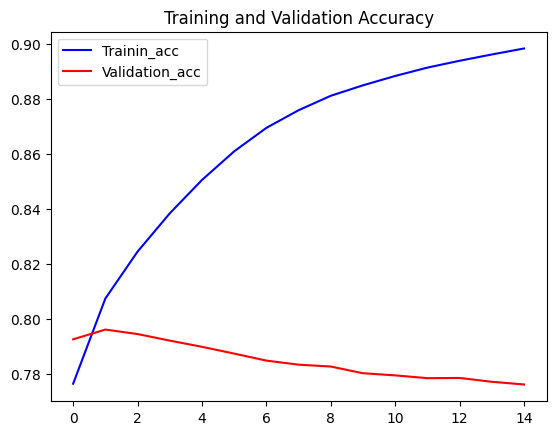

In [60]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

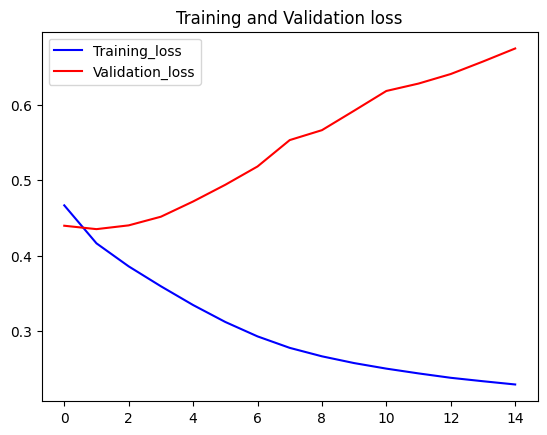

In [61]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

In [62]:
def preprocess(text):
    review=re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+',' ',text)
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stop_words]
    print(review)
    review=pad_sequences(tokenizer.texts_to_sequences([review]), maxlen=300)
    return review

In [63]:
def prediction(review):
    review=preprocess(review)
    score=model.predict(review)
    score=score[0]
    if score<0.4:
        print("Negative")
    elif score>0.4 and score<0.6:
        print("Neutral")
    else:
        print("Positive")
    print(score)

In [64]:
pred1 = prediction("the food is not bad")
pred2 = prediction("the film was horrible")
print(pred1)
print(pred2)

['food', 'not', 'bad']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Positive
[0.7490714]
['film', 'horrible']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Negative
[0.04400789]
None
None


In [65]:
scores = model.predict(X_test, verbose=1, batch_size=1024)
scores


313/313 ━━━━━━━━━━━━━━━━━━━━ 206s 656ms/step


array([[0.01436329],
       [0.9873881 ],
       [0.98605555],
       ...,
       [0.99999964],
       [0.95954317],
       [0.996601  ]], dtype=float32)

In [66]:
y_pred=np.where(scores>0.5,1,0)
y_pred


array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [67]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[123662  34966]
 [ 36384 124988]]


In [68]:
print(accuracy_score(y_pred,y_test))


0.77703125


In [69]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.77      0.78    160046
           1       0.77      0.78      0.78    159954

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [73]:
joblib.dump(w2v_model,'word2vec.pkl')
joblib.dump(tokenizer,'tokenizer.pkl')
model.save('final_model.h5') 
